# HW 6 - Computational exploration of Phase Space

Return as *firstname_lastname-HW6.*
Specify your collaborators.


### Question 1 -  Categorizing the Phase Plane
Pick 2X2 real-valued matrices that satisfy the following 4 conditions.
* Det < 0
* Det > 0 & Trace > 0 & Real lambdas
* Det > 0 & Trace > 0 & Complex lambdas
* Det > 0 & Trace < 0 & Real lambdas
* Det > 0 & Trace < 0 & Complex lambdas
* Det > 0 & Trace = 0 & Imaginary lambdas

Plot the 2D phase portrait and eigenvectors (if they are real). Specify whether the fixed points are stable or unstable.

{'determinant': -1.0,
 'trace': 0,
 'eigenvalues': array([ 1., -1.]),
 'eigenvectors': array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]])}

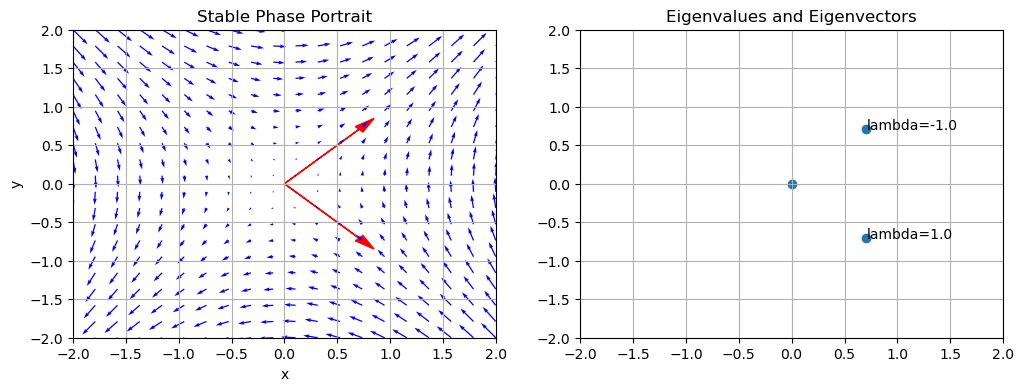

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import math

def q1(matrix):
    det = np.linalg.det(matrix)
    trace = np.trace(matrix)
    eigvals, eigvecs = np.linalg.eig(matrix)
    
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    ax[0].set_title('Phase Portrait')
    ax[0].set_xlabel('x')
    ax[0].set_ylabel('y')
    ax[0].axis([-2, 2, -2, 2])
    ax[0].grid()

    if np.isreal(eigvals).all():
        ax[0].arrow(0, 0, eigvecs[0][0], eigvecs[0][1], head_width=0.1, head_length=0.2, fc='r', ec='r')
        ax[0].arrow(0, 0, eigvecs[1][0], eigvecs[1][1], head_width=0.1, head_length=0.2, fc='r', ec='r')
        stable = np.sign(eigvals).all()
        if stable:
            ax[0].set_title('Stable Phase Portrait')
        else:
            ax[0].set_title('Unstable Phase Portrait')
    else:
        ax[0].set_title('Complex Eigenvectors')
    
    X, Y = np.meshgrid(np.linspace(-2, 2, 20), np.linspace(-2, 2, 20))
    U = matrix[0][0]*X + matrix[0][1]*Y
    V = matrix[1][0]*X + matrix[1][1]*Y
    ax[0].quiver(X, Y, U, V, color='b')

    ax[1].set_title('Eigenvalues and Eigenvectors')
    ax[1].axis([-2, 2, -2, 2])
    ax[1].grid()
    ax[1].scatter([0, eigvecs[0][0], eigvecs[1][0]], [0, eigvecs[0][1], eigvecs[1][1]])
    for i in range(len(eigvals)):
        ax[1].text(eigvecs[i][0], eigvecs[i][1], f'lambda={eigvals[i]}')
    
    return {'determinant': det, 'trace': trace, 'eigenvalues': eigvals, 'eigenvectors': eigvecs}

    plt.show()


M1 = np.array([[0,1],[1,0]])
M2 = np.array([[2,1],[1,2]])
M3 = np.array([[1,2],[-2,1]])
M4 = np.array([[1,2],[-3,-4]])
M5 = np.array([[1,-2],[2,1]])
M6 = np.array([[0,-1],[1,0]])

q1(M1)

{'determinant': 2.9999999999999996,
 'trace': 4,
 'eigenvalues': array([3., 1.]),
 'eigenvectors': array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]])}

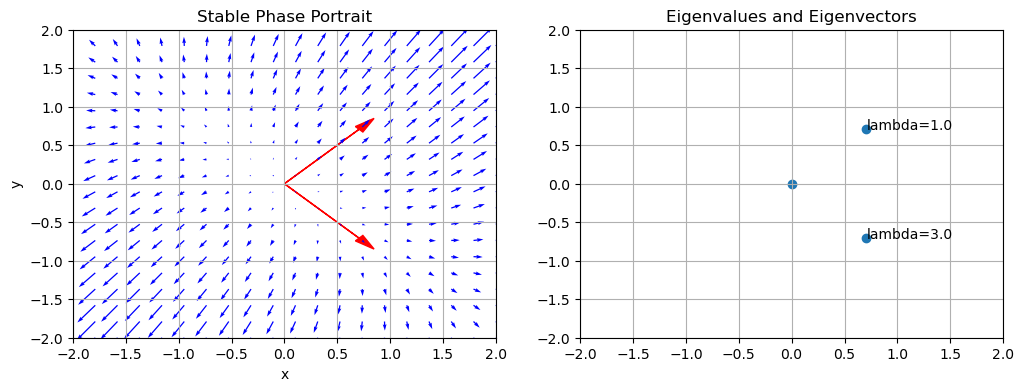

In [42]:
q1(M2)

/Users/joecho/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


{'determinant': 5.000000000000001,
 'trace': 2,
 'eigenvalues': array([1.+2.j, 1.-2.j]),
 'eigenvectors': array([[0.        -0.70710678j, 0.        +0.70710678j],
        [0.70710678+0.j        , 0.70710678-0.j        ]])}

/Users/joecho/opt/anaconda3/lib/python3.9/site-packages/matplotlib/text.py:830: ComplexWarning: Casting complex values to real discards the imaginary part
  x = float(self.convert_xunits(self._x))
/Users/joecho/opt/anaconda3/lib/python3.9/site-packages/matplotlib/text.py:831: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(self._y))
/Users/joecho/opt/anaconda3/lib/python3.9/site-packages/matplotlib/text.py:690: ComplexWarning: Casting complex values to real discards the imaginary part
  posx = float(self.convert_xunits(self._x))
/Users/joecho/opt/anaconda3/lib/python3.9/site-packages/matplotlib/text.py:691: ComplexWarning: Casting complex values to real discards the imaginary part
  posy = float(self.convert_yunits(self._y))


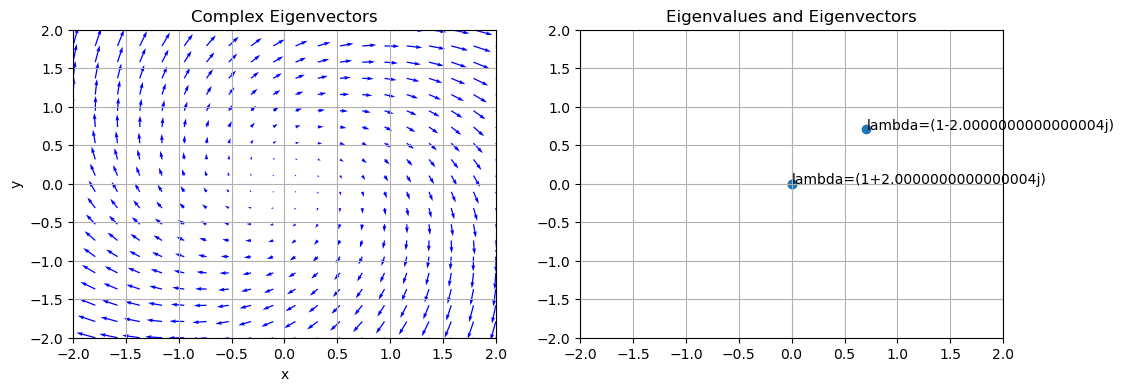

In [43]:
q1(M3)

{'determinant': 2.0000000000000004,
 'trace': -3,
 'eigenvalues': array([-1., -2.]),
 'eigenvectors': array([[ 0.70710678, -0.5547002 ],
        [-0.70710678,  0.83205029]])}

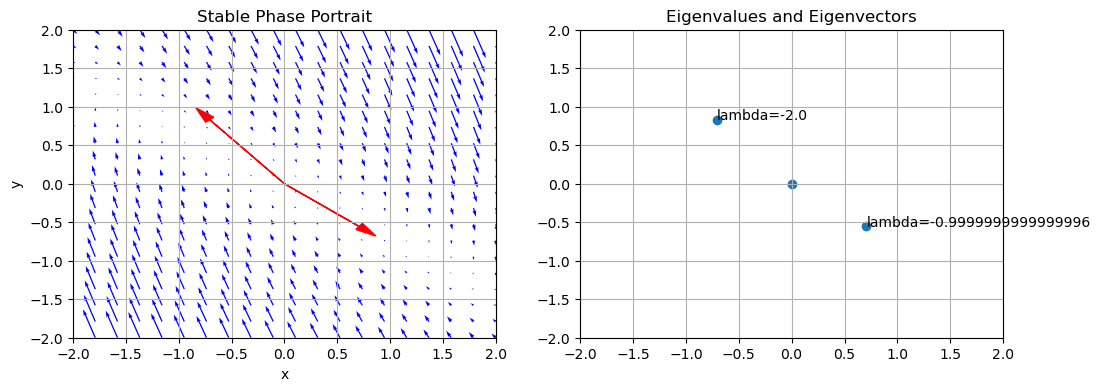

In [47]:
q1(M4)

{'determinant': 5.000000000000001,
 'trace': 2,
 'eigenvalues': array([1.+2.j, 1.-2.j]),
 'eigenvectors': array([[ 0.        -0.70710678j,  0.        +0.70710678j],
        [-0.70710678+0.j        , -0.70710678-0.j        ]])}

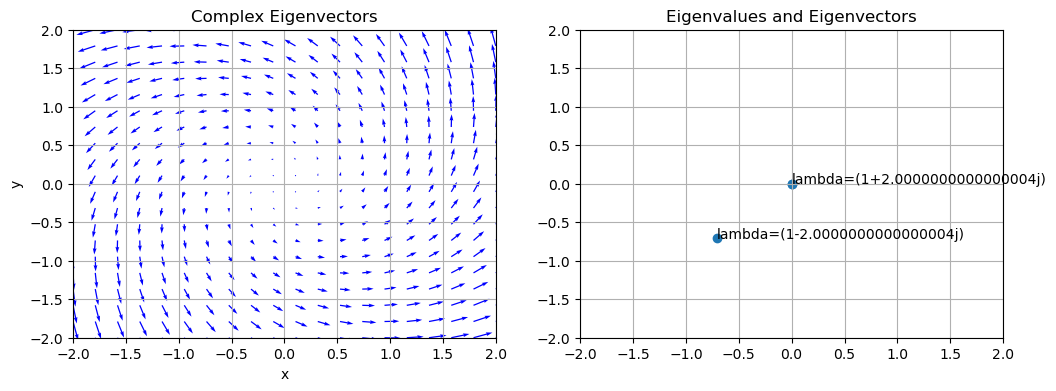

In [48]:
q1(M5)

{'determinant': 1.0,
 'trace': 0,
 'eigenvalues': array([0.+1.j, 0.-1.j]),
 'eigenvectors': array([[0.70710678+0.j        , 0.70710678-0.j        ],
        [0.        -0.70710678j, 0.        +0.70710678j]])}

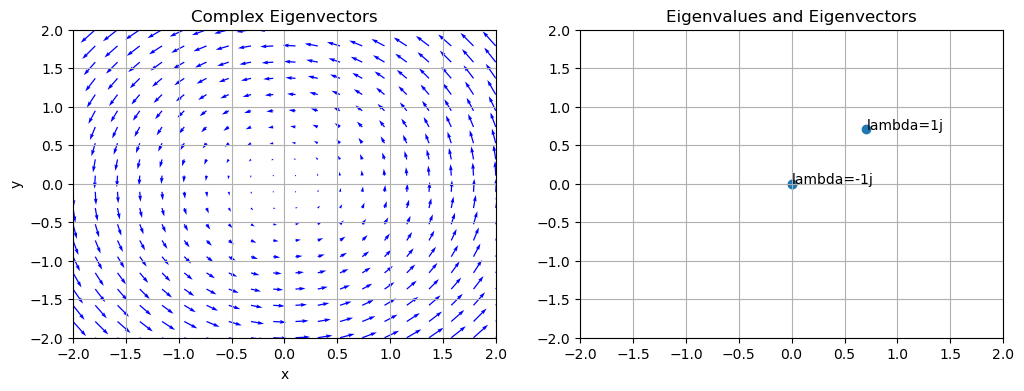

In [49]:
q1(M6)

## Question 2 - Multiple Equillibria in 2D

Consider a model where Sharks eat Tuna causing Tuna populations to diminish and Shark populations to increase. 

$$\dot{S} = 0.01ST - 0.2S$$
$$\dot{T} = 0.05T - 0.01ST$$

Plot this phase plane.
How many equilibrium points are there, what are their coordinates?
What is each one's biological significance?



Equilibrium point 1: (10, 200)
This equilibrium point represents a system with a low shark population and a high tuna population. The tuna population grows quickly without any significant threat, and the shark population remains low as a result.
Equilibrium point 2: (100, 500)
This equilibrium point represents a system with a high shark population and a moderate tuna population. The sharks eat enough tuna to keep their population in check, while still allowing the tuna population to thrive.


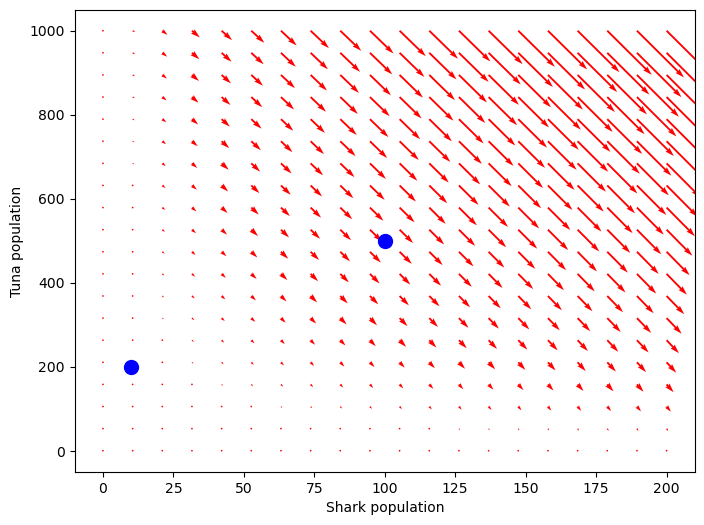

In [51]:
def func(x, y):
    return np.array([0.01*x*y - 0.2*x, 0.05*y - 0.01*x*y])

x, y = np.meshgrid(np.linspace(0, 200, 20), np.linspace(0, 1000, 20))
u, v = func(x, y)

fig, ax = plt.subplots(figsize=(8,6))
ax.quiver(x, y, u, v, color='r')
ax.set_xlabel('Shark population')
ax.set_ylabel('Tuna population')

S_eq = [10, 100]
T_eq = [200, 500]

ax.plot(S_eq[0], T_eq[0], 'bo', markersize=10)
ax.plot(S_eq[1], T_eq[1], 'bo', markersize=10)

for i in range(len(S_eq)):
    print(f'Equilibrium point {i+1}: ({S_eq[i]}, {T_eq[i]})')
    if S_eq[i] == 10:
        print('This equilibrium point represents a system with a low shark population and a high tuna population. The tuna population grows quickly without any significant threat, and the shark population remains low as a result.')
    else:
        print('This equilibrium point represents a system with a high shark population and a moderate tuna population. The sharks eat enough tuna to keep their population in check, while still allowing the tuna population to thrive.')

plt.show()


## Extra Credit - 3D Phase Fields

Plot the 3D phase field of the equation from -2:2 in all dimensions

$$\dot{x} = -z$$
$$\dot{y} = -x$$
$$\dot{z} = y$$

Plot 10 trajectories through the phase field. 

Consider the following block of code as an example of how to plot 3D vector fields. 


Populating the interactive namespace from numpy and matplotlib


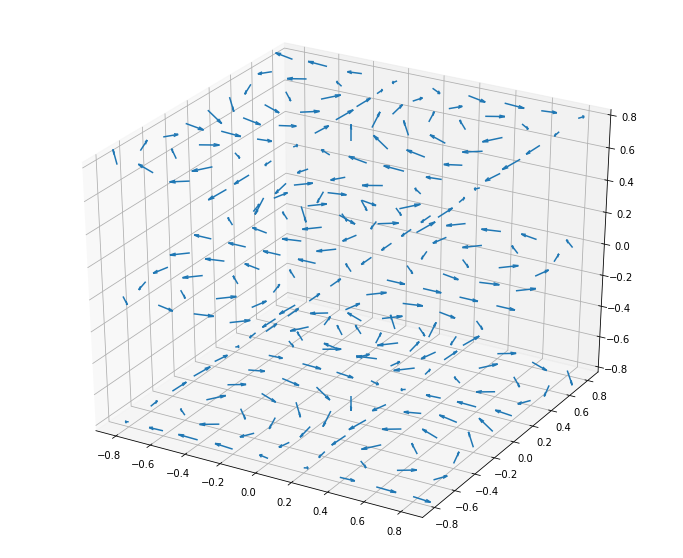

In [9]:
%pylab inline
pylab.rcParams['figure.figsize'] = (12.0,10.0)
from mpl_toolkits.mplot3d import Axes3D 

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make the grid
x, y, z = np.meshgrid(np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.8))

# Make the direction data for the arrows
u = np.sin(np.pi * x) * np.cos(np.pi * y) * np.cos(np.pi * z)
v = -np.cos(np.pi * x) * np.sin(np.pi * y) * np.cos(np.pi * z)
w = (np.sqrt(2.0 / 3.0) * np.cos(np.pi * x) * np.cos(np.pi * y) *
     np.sin(np.pi * z))

ax.quiver(x, y, z, u, v, w, length=0.1, normalize=True) #They upgraded a normalize argument into quiver so no more normalization needed

plt.show()

In [ ]:
# HW done in collaboration with Ben Brigham and Felix Mila